# Feature Engineering for Customer Churn Prediction

This Jupyter Notebook demonstrates feature engineering techniques to enhance the predictive power of models using the Telco Customer Churn dataset.


## Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

## Load the Data

In [2]:
# Load the dataset
data_path = './processed_telco_churn.csv'
df = pd.read_csv(data_path)

In [3]:
print(df.head())
print(df.columns)

   gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
0       0              0        1           0 -1.277445             0   
1       1              0        0           0  0.066327             1   
2       1              0        0           0 -1.236724             1   
3       1              0        0           0  0.514251             0   
4       0              0        0           0 -1.236724             1   

   PaperlessBilling  MonthlyCharges  TotalCharges  Churn  ...  \
0                 1       -1.160323     -0.994971      0  ...   
1                 0       -0.259629     -0.173876      0  ...   
2                 1       -0.362660     -0.960399      1  ...   
3                 0       -0.746535     -0.195400      0  ...   
4                 1        0.197365     -0.941193      1  ...   

   StreamingTV_No internet service  StreamingTV_Yes  \
0                            False            False   
1                            False            False   
2    

## Create Interaction Terms

In [4]:
# Interaction between 'tenure' and 'MonthlyCharges'
df['tenure_monthlycharges_interaction'] = df['tenure'] * df['MonthlyCharges']

# Interaction between 'tenure' and 'TotalCharges'
df['tenure_totalcharges_interaction'] = df['tenure'] * df['TotalCharges']

## Polynomial Features

In [5]:
poly = PolynomialFeatures(degree=2, include_bias=False)
features = df[['tenure', 'MonthlyCharges']]
poly_features = poly.fit_transform(features)
poly_feature_names = poly.get_feature_names_out(['tenure', 'MonthlyCharges'])

# Create a DataFrame from the polynomial features with unique column names
poly_features_df = pd.DataFrame(poly_features, columns=poly_feature_names)

# Concatenate only non-overlapping columns
overlap_columns = set(df.columns).intersection(set(poly_features_df.columns))
df = pd.concat([df, poly_features_df.loc[:, ~poly_features_df.columns.isin(overlap_columns)]], axis=1)

## Normalize 'MonthlyCharges'
scaler = StandardScaler()
df['MonthlyCharges_scaled'] = scaler.fit_transform(df[['MonthlyCharges']])

## Save the Enhanced Data

In [6]:
df.to_csv('enhanced_feature_data.csv', index=False)

## Visualize Some Data

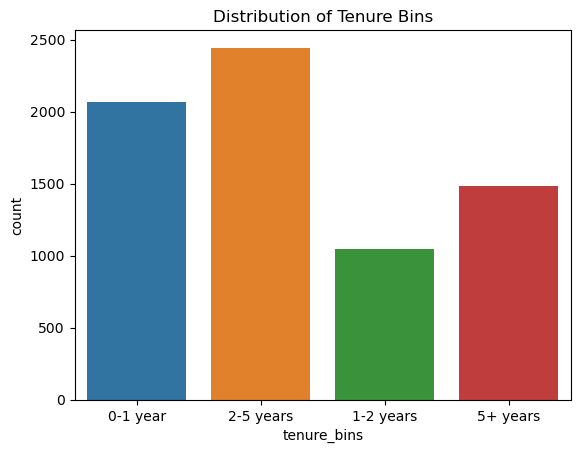

In [7]:
## Visualize the Distribution of 'tenure_bins'
sns.countplot(x='tenure_bins', data=df)
plt.title('Distribution of Tenure Bins')
plt.show()